# Lecture 4: Linear Models Perceptron


Applied Machine Learning 


Professor: __Ramesh Natarajan__ \
Email: **ramesh.natarajan@yu.edu** \
Department of Computer Science \
Stern College and Yeshiva University

Date: Jan 31, 2024



## Acknowledgements

1. The starting point for developing the notebook-based instruction material was the set of notebooks provided by the previous  course instructor__[Prof. Zach Glassman](https://www.linkedin.com/in/zachary-glassman-7088844b/)__.
2. These notebooks have been augmented by similar instruction material taken from many, many other sources, including official documentation from many ML libraries and frameworks. I have adapted and modified the content where needed to make it compatible with student level, orientation and proficiency in this course.
3. The primary addition sources include:
   1. Course content from V. Kuleshov, Cornell Tech __[repo](https://github.com/kuleshov/cornell-cs5785-2020-applied-ml/blob/main/notebooks/lecture1-introduction.ipynb)__.
   2. Book and support material from Hal Daume II, __[A course in Machine Learning](http://ciml.info)__. __[repo](https://github.com/hal3/ciml/)__
   3. Book and support material from A. Geron, __[Hands-On Machine Learning with Scikit-Learn, Keras and Tensorflow (3rd edition)](https://homl.info/er3)__. __[repo](https://github.com/ageron/handson-ml3/blob/main/README.md)__




# Announcements

1. Problem Set 1 past due.  Problems Set 2 released  
2. Recitations will review __[Lecture-03-DecisionTrees.ipynb](https://github.com/rameshnatarajanus/stern-comp3921f-spring2024/blob/main/notebooks/Lecture-03-DecisionTrees.ipynb)__.
3. You should continue  to review and refresh yourself on the mathematical prerequisites for applied machine learning from part 1 for Deisenroth, Faisal and Ong, __[Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf)__.


# Perceptron Introduction


<table>
    <td width="40%">
        <center>
            <img src="./img/Lecture-04/perceptron-creative.png"/>    
        </center>
    Generated by Chat-GPT 
     </td>  
    <td>
<ul>
<font size = "+1.5">
 Perceptron: A type of artificial neuron, which is inspired by the biological function of neurons in the brain (e.g. an architecture that is connectionist, exhibits plasticity, using thresholding and firing rules, low power, massively parallel, learns by adjusting "synaptic weights" by trial and error. <br><br>

<center>
    <img src="./img/Lecture-04/Anatomy-of-neuron.png"/>    
</center>
<a href="https://en.wikipedia.org/wiki/File:Anatomy-of-neuron.png">Source </a>
</font>
</ul>

</td></table> 

# Perceptron Model 

<center>
    <img src="./img/Lecture-04/perception-architecture.png" width="500"/>    
</center>

Consider the training dataset $(x_i, y_i), i = 1, \ldots, N$, where $x_i = \left[x_{i, 1}, \ldots, x_{i, d}\right] \in {\bf{x}}, \quad y_i \in \{-1, +1\}$.  $\bf{x}$ is assumed to be $d$-dimensional and standardized to have mean zero and standard deviation 1.

The Perceptron model takes the form:

$\hat{y} = \text{Sign} \left( \theta_0 + \theta_1 x_1 + \ldots +  \theta_d  x_d \right)$.

Here $\hat{y}$ is the output, $\text{Sign}$ is the "activation" function which maps a real value to $-1$ or $+1$. 

The bias $\theta_0$ can be incorporated into the weights by defining a "fictitious" constant input feature $x_{i,0} = 1$, so that the augmented $(d+1)$ dimensional input feature is $x_i = [x_{i, 0}, \ldots, x_{i, d}] $  and  ${\theta} = \left[\theta_0, \ldots, \theta_d\right] $ are the weights. 



# Perceptron training algorithm (offline)



+ Initialize the weights $\theta_i$ (e.g. to 0)
  
+ For each training example $(x_i, y_i), i = 1, \ldots, N$ 
  
  + Calculate the prediction: $\hat{y}_i = \mbox{Sign} \left( \theta_0 x_{i,0} + \theta_1 x_{i,1} + \ldots +  \theta_d  x_{i,d} \right)$.
    
  + Update the weights: $\theta_j \leftarrow \theta_j + \alpha (\hat{y}_i - y_i) x_{j, i}$ for $ j = 1, \ldots, d$.

+ Repeat the previous step till a stopping condition, viz. maximum number of iterations $M$, or reduction in the error $e = (1/N) \sum_{i=1}^N (\hat{y}_i - y_i)$ below a user-specified positive threshold $\gamma$.

Hyper-parameters of the training algorithm:learning rate $\alpha$, max number of iterations $M$, and convergence threshold $\gamma$

The perceptron algorithm only converges if the two classes are linearly separable, and even in this case may not find the hyperplance with the **maximum margin**. 

This algorithm is an important early example of **online learning** where model parameters are updated each time a training example is presented! 


# Interpretation, Convergence and Limitations

+ The perceptron as a linear classifier; the decision boundary is a hyperplane in feature space.
+ The weights can be interpreted in geometric terms (assume that features are normalizedtp be measured on the same scale).
+ The perceptron algorithm converges to a separating hyperplance when the classes are linear separable.  The final solution is non-unique and depends on the initialization, and the number of iterations depends on the learning rate and the gap between the 2 classes.
+ If the classes are not separable then the algorithm will not converge, but the cycles may be long and difficult to detext.


# Geometric Interpretation of Separating Hyperplane


<center>
    <img src="./img/Lecture-04/margin.png" width="400"/>    
</center>

Consider the hyperplane $L: \quad  \theta^T x = 0$.  If we consider the vectors to the 2 points $x_1, x_2 \in L$, then the vector $x_1 - x_2$ lies wholly in $L$, and since $\theta^T (x_2 - x_1) = 0$, the vector $\theta$ is orthogonal to the hyperplane $L$.


A line passing through an example $x_0$ that is parallel to the vector $\theta$ is given by $x_0 + t \theta$ for some real number $t$, and $||t\theta||$ represents the distance of any point on that line from $x_0$.

This line intersects the hyperplane $L$ at $t = -\theta^T x_0/||\theta||^2$, and hence the distance from $x_0$ to the hyperplane $L$ is given by  $||t\theta|| = |\theta^T  x_0|/||\theta||$.  




# Max Margin Principle 

<table>
    <td width="40%">
        <center>
        <img src="./img/Lecture-04/hyperplane.png"/>        
        </center>
     </td>  
    <td>
<ul>
<font size = "+1.5">


The margin $\gamma$ is defined as the closest distance from the decision hyperplane to the instances in each class.

$\gamma = \arg\min_{(x,y)} y (\theta^T x)/ ||\theta||$.
    
In the separable case, the ideal decision boundary from the perceptron should maximise the margin in the case where the classification feature sets are linearly separable.  This leads to a unique solution to the perceptron problem, that provides better generalization performance on the test data. 


</font>
</ul>

</td></table> 


In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris(as_frame=True)
iris_X, iris_y = iris.data, iris.target

# subsample to a third of the data points
iris_X = iris_X.loc[::4]
iris_y = iris_y.loc[::4]

# create a binary classification dataset with labels +/- 1
iris_y2 = iris_y.copy()
iris_y2[iris_y2==2] = 1
iris_y2[iris_y2==0] = -1

# print part of the dataset
pd.concat([iris_X, iris_y2], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,-1
4,5.0,3.6,1.4,0.2,-1
8,4.4,2.9,1.4,0.2,-1
12,4.8,3.0,1.4,0.1,-1
16,5.4,3.9,1.3,0.4,-1


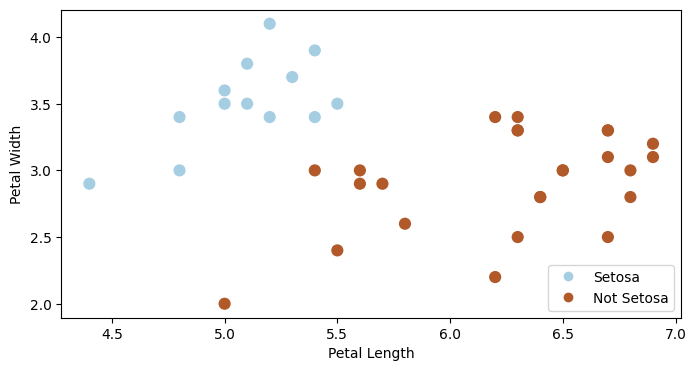

In [5]:

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]
import warnings
warnings.filterwarnings("ignore")

# create 2d version of dataset and subsample it
X = iris_X.to_numpy()[:,:2]
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

# Plot also the training points
p1 = plt.scatter(X[:, 0], X[:, 1], c=iris_y2, s=60, cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Not Setosa'], loc='lower right')
plt.show()

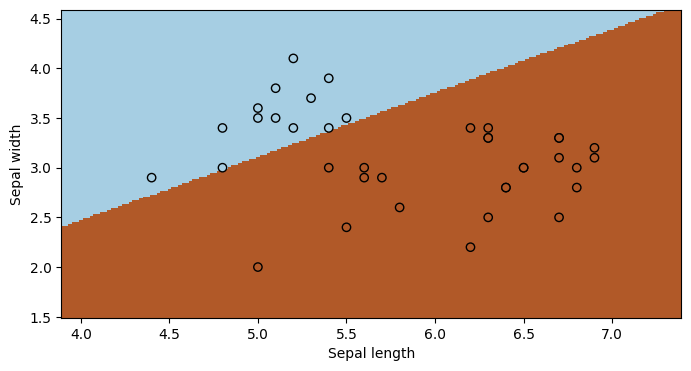

In [10]:
from sklearn.linear_model import Perceptron

model = Perceptron( tol = 0.5)

def fit_and_create_boundary(model):
    model.fit(X, iris_y2)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return Z

plt.figure(figsize=(8,4))

Z = fit_and_create_boundary(model)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired) 

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=iris_y2, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

# Summary and Limitations

+ The perceptron is mainly of historic interest particularly for its "connectionist" origins.

+ It is, however, the basis for many of the recent approaches to supervised learning, which have removed many of the limitations in its original for practical applications.
  
+ Margin-based approaches to include the linearly non-separable case that minimize the misclassification error (Support Vector Machines or SVM).

+ Non-convergence (ex. the XOR problem) in the linearly non-separable case (Feed-forward neural networks, Kernel-based SVM's etc.)

<center>
<img src="./img/Lecture-04/xor-problem.png" width="400"/> 
</center>

+ Voting and Averaging of multiple perceptron models (Ensemble learning)
